In [54]:
import requests

In [1]:
import os
from PIL import Image
from random import sample, choices
import numpy as np

In [2]:
COL = 188 #指定拼接图片的列数
ROW = 126 #指定拼接图片的行数
UNIT_HEIGHT_SIZE = 256 #图片高度
UNIT_WIDTH_SIZE = 256 #图片宽度
PATH = "../level20_1931/" #需要拼接的图片所在的路径
NAME = "level20" #拼接出的图片保存的名字
DEAFULT_WHITE_PATH = "./test_img/0/0.jpg"
RANDOM_SELECT = False #设置是否可重复抽取图片
SAVE_QUALITY = 5 #保存的图片的质量 可选0-100

In [3]:
swiss_map = [[False for j in range(COL)] for i in range(ROW)]
min_row = 1000
max_row = 0
min_col = 1000
max_col = 0

In [4]:
for col in range(COL):
    for row in range(ROW):
        img_path = PATH + str(col) + '/' + str(row) + '.png'
        with Image.open(img_path) as f:
            num_img = np.asarray(f)
            if num_img.sum() != 0:
                min_col = min(min_col, col)
                min_row = min(min_row, row)
                max_col = max(max_col, col)
                max_row = max(max_row, row)
                swiss_map[row][col] = True
max_col = 0
for col in range(COL):
    img_path = PATH + str(col) + '/' + str(max_row) + '.png'
    with Image.open(img_path) as f:
        num_img = np.asarray(f)
        if num_img.sum() != 0:
            max_col = max(max_col, col)
print(min_col)
print(min_row)
print(max_col)
print(max_row)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


In [8]:
#进行图片的复制拼接
def concat_images(name, path, min_col, min_row, max_col, max_row):
    target = Image.new('RGB', (UNIT_WIDTH_SIZE * (max_col - min_col + 1), UNIT_HEIGHT_SIZE * (max_row - min_row + 1)), 'white') #创建成品图的画布
    #第一个参数RGB表示创建RGB彩色图，第二个参数传入元组指定图片大小，第三个参数可指定颜色，默认为黑色
    for row in range(min_row, max_row + 1):
        for col in range(min_col, max_col + 1):
            img_path = path + str(col) + '/' + str(row) + '.png'
            if(os.path.exists(img_path)):
                with Image.open(img_path) as f:
                    target.paste(f, (0 + UNIT_WIDTH_SIZE*(col-min_col), 0 + UNIT_HEIGHT_SIZE*(row-min_row)))
                    # print("row: " + str(row) + "col: " + str(col))
            #对图片进行逐行拼接
            #paste方法第一个参数指定需要拼接的图片，第二个参数为二元元组（指定复制位置的左上角坐标）
            #或四元元组（指定复制位置的左上角和右下角坐标）
            
    target.save("./" + name + '.png', quality=SAVE_QUALITY) #成品图保存

In [10]:
NAME = "level20_1931small_original" #拼接出的图片保存的名字
UNIT_HEIGHT_SIZE = 256 #图片高度
UNIT_WIDTH_SIZE = 256 #图片宽度
PATH = "../level20_1931/" #需要拼接的图片所在的路径
SAVE_QUALITY = 5 #保存的图片的质量 可选0-100
min_row = 70
max_row = 84
min_col = 78
max_col = 98
concat_images(NAME, PATH, min_col, min_row, max_col, max_row)
labels = np.zeros([UNIT_HEIGHT_SIZE * (max_row - min_row + 1), UNIT_WIDTH_SIZE * (max_col - min_col + 1)], dtype=bool)
np.save("./labels_small.npy", labels)

row: 70col: 78
row: 70col: 79
row: 70col: 80
row: 70col: 81
row: 70col: 82
row: 70col: 83
row: 70col: 84
row: 70col: 85
row: 70col: 86
row: 70col: 87
row: 70col: 88
row: 70col: 89
row: 70col: 90
row: 70col: 91
row: 70col: 92
row: 70col: 93
row: 70col: 94
row: 70col: 95
row: 70col: 96
row: 70col: 97
row: 70col: 98
row: 71col: 78
row: 71col: 79
row: 71col: 80
row: 71col: 81
row: 71col: 82
row: 71col: 83
row: 71col: 84
row: 71col: 85
row: 71col: 86
row: 71col: 87
row: 71col: 88
row: 71col: 89
row: 71col: 90
row: 71col: 91
row: 71col: 92
row: 71col: 93
row: 71col: 94
row: 71col: 95
row: 71col: 96
row: 71col: 97
row: 71col: 98
row: 72col: 78
row: 72col: 79
row: 72col: 80
row: 72col: 81
row: 72col: 82
row: 72col: 83
row: 72col: 84
row: 72col: 85
row: 72col: 86
row: 72col: 87
row: 72col: 88
row: 72col: 89
row: 72col: 90
row: 72col: 91
row: 72col: 92
row: 72col: 93
row: 72col: 94
row: 72col: 95
row: 72col: 96
row: 72col: 97
row: 72col: 98
row: 73col: 78
row: 73col: 79
row: 73col: 80
row: 73col

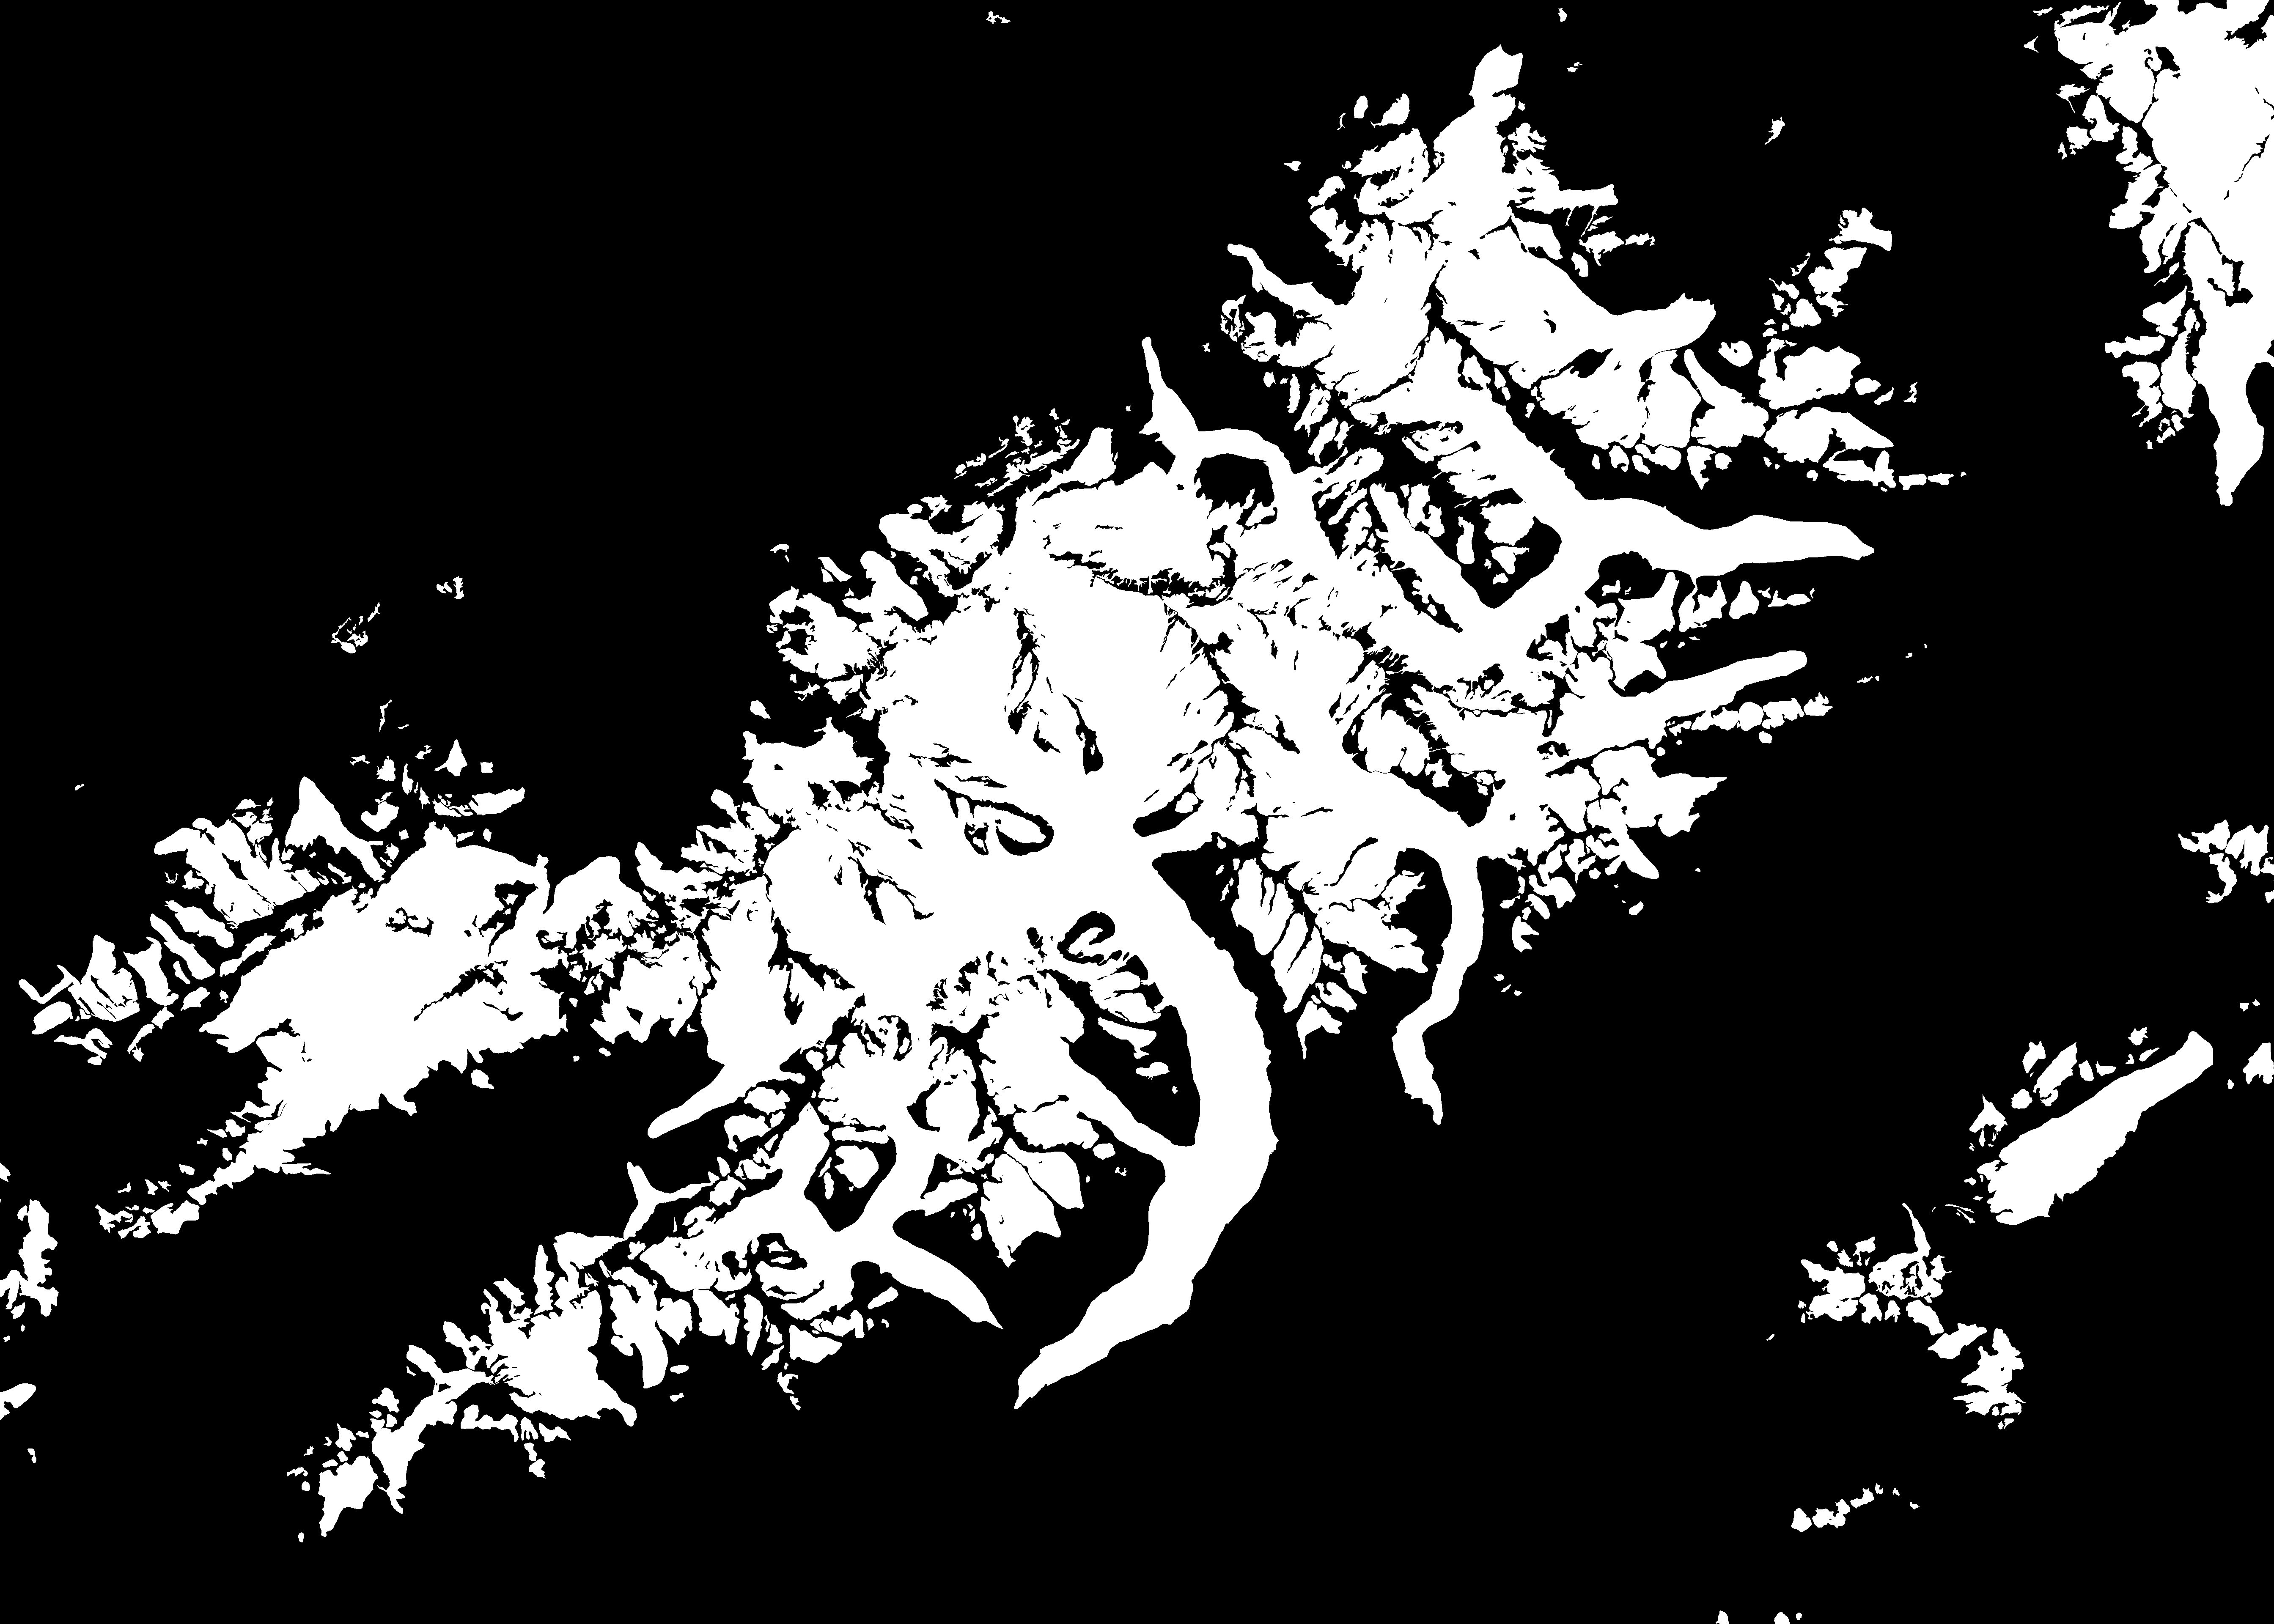

In [2]:
new_labels=np.load("./new_labels_small.npy")
lf = Image.fromarray(new_labels)
img_path = "./level20_small.png"
f = Image.open(img_path)
f = f.convert('RGB')
lf = lf.convert('RGB')
res = Image.blend(f, lf, 0.6)
res.save("./check_level20_small.png", quality=5) #成品图保存